# Ecuación de estado Master (Caso newtoniano)

Resolveremos el sistema de ecuaciones de estructura estelar asumiendo una relación $P=P(\rho)$ un poco más realista. Para determinar las incógnitas $P(r)$, $\rho(r)$ y $m(r)$ de la ecuación de equilibrio hidrostático 

\begin{equation}
\frac{\mathrm{d}P}{\mathrm{d}r}=-\frac{G m}{r^2}\rho+\frac{2}{r}\left(P_{\perp}-P\right)
\end{equation}

### Ecuaciones de estado:   $P = \kappa \rho^{1 + \frac1n} + \alpha \rho -\beta $


###  Master Lane-Emden:
\begin{equation}
\frac{1}{\xi^2}\frac{\mathrm{d}}{\mathrm{d}\xi} \left[ \xi^2 \left(1+ \frac{b}{\Psi}  \right) \frac{\mathrm{d} \Psi}{\mathrm{d}\xi}\right]  + h \Psi^{n} =0
\end{equation}

Y la presión vendrá dada por
\begin{equation}
\frac{\mathcal{P}}{\mathcal{P}_c}=\frac{\Psi^{n} \left[\Psi  +\left(1+\frac1n\right)   b  \right] -\Psi_1^{n} \left[\Psi_1  +\left(1+\frac1n\right)  b  \right] }{ 1  +\left(1+\frac1n\right)   b   -\Psi_1^{n} \left[\Psi_1  +\left(1+\frac1n\right)  b  \right] } 
\end{equation}

donde $\Psi_1=\Psi(\xi_1)$, define la superficie de la estrella. 


In [1]:
# -*- coding: utf-8 -*-
from matplotlib.pyplot import *
from numpy import *
from scipy.integrate import odeint, quad
import matplotlib.pyplot as plt
style.use('classic')
    
def dtheta(theta, x, n):
        return(theta[1], -(h*theta[0])**(n)/(1+b/theta[0]) - (2/x)*theta[1] + b/((theta[0]**2)*(1+b/theta[0]))*(theta[1])**2 )

h = 1.0 - 0.1              
b = -0.49
N = 10000
R = 1.0
theta0 = [1.0, 0.0]
x = linspace(1.0e-30, R, N)
enes = [1/2,1,3/2,2,3,5,8]
Thetas = []
Thetasp = []

for i in range(len(enes)):
	sol = odeint(dtheta, theta0, x, args=(enes[i],))
	Thetas.append(sol[:,0]),Thetasp.append(sol[:,1])

rhob = [] 
for i in range(len(enes)):     
    lista = Thetas[i]
    ult = lista[-1]
    rhob.append(ult) 

print(rhob) 

[0.5993303051762084, 0.6608156891312298, 0.7015020884011262, 0.7323611059687869, 0.7778904970325619, 0.8363201253720434, 0.8877474117845451]


/Users/hector/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


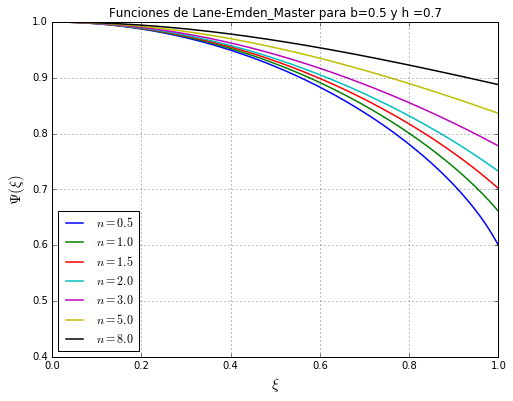

In [2]:
fig, axes = plt.subplots(figsize=(8,6))
for i in range(len(enes)):
	axes.plot(x[:len(Thetas[i])], Thetas[i], label='$n = %1.1f$'%enes[i], linewidth=1.50)
axes.legend(loc='best')
axes.set_title(u'Funciones de Lane-Emden_Master para b=0.5 y h =0.7')
axes.set_xlabel('$\\xi$', fontsize=15)
axes.set_ylabel('$\Psi(\\xi)$', fontsize=15)
axes.set_xlim(0,R)
axes.set_ylim(0.4,1)
axes.grid()
fig.savefig('/Volumes/HOME/Proyectos/MasterNewton/Master-newtoniano/Gamma_b05h07.pdf')
fig.show()

In [3]:
Pes = []   
for i in range(len(enes)):
    print (rhob[i])
    T1 = (rhob[i])**enes[i]*(rhob[i] + (1+1/enes[i])*b) 
    T = (Thetas[i])**enes[i]*(Thetas[i] + (1+1/enes[i])*b )
    P = (T-T1)/(1+(1+1/enes[i])*b - T1)   
    Pes.append(P)

0.5993303051762084
0.6608156891312298
0.7015020884011262
0.7323611059687869
0.7778904970325619
0.8363201253720434
0.8877474117845451


/Users/hector/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


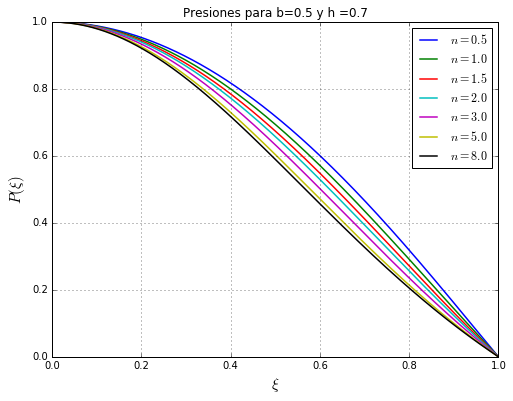

In [4]:
fig, axes = plt.subplots(figsize=(8,6))
for i in range(len(enes)):
	axes.plot(x[:len(Pes[i])], Pes[i],  label='$n = %1.1f$'%enes[i], linewidth=1.50)
axes.legend(loc='best')
axes.set_title(u'Presiones para b=0.5 y h =0.7')
axes.set_xlabel('$\\xi$', fontsize=15)
axes.set_ylabel('$P (\\xi)$', fontsize=15)
axes.set_xlim(0,R)
axes.set_ylim(0,1)
axes.grid()
fig.savefig('/Volumes/HOME/Proyectos/MasterNewton/Master-newtoniano/Presion_b05h07.pdf')
fig.show()

In [5]:
C = (1-h)/2

Ani = []   
for i in range(len(enes)):
    D1 = C*(1+enes[i])*x/h
    D2 = (1+b/Thetas[i])*(Thetas[i])**enes[i]
    D3 = 1+(1+1/enes[i])*b - (rhob[i])**enes[i]*((rhob[i])+(1+1/enes[i])*b)
    Delta = -D1*D2/D3*Thetasp[i]  
    Ani.append(Delta)
    
print (C)

0.04999999999999999


/Users/hector/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


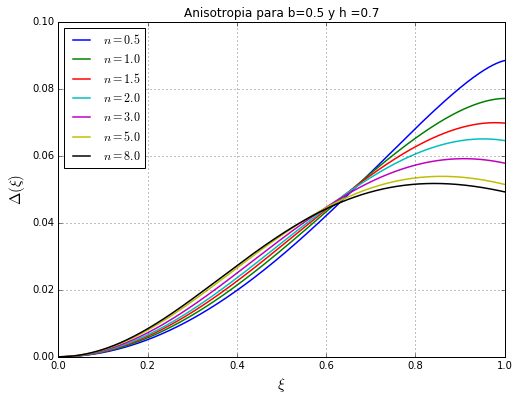

In [6]:
fig, axes = plt.subplots(figsize=(8,6))
for i in range(len(enes)):
	axes.plot(x[:len(Ani[i])], Ani[i],  label='$n = %1.1f$'%enes[i], linewidth=1.50)
axes.legend(loc='best')
axes.set_title(u'Anisotropia para b=0.5 y h =0.7')
axes.set_xlabel('$\\xi$', fontsize=15)
axes.set_ylabel('$\Delta (\\xi)$', fontsize=15)
axes.set_xlim(0,R)
axes.set_ylim(0,0.1)
axes.grid()
fig.savefig('/Volumes/HOME/Proyectos/MasterNewton/Master-newtoniano/Anis_b05h07.pdf')
fig.show()

In [7]:
Pet = []   
for i in range(len(enes)):
    Pt = Ani[i] + Pes[i]
    Pet.append(Pt)

/Users/hector/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


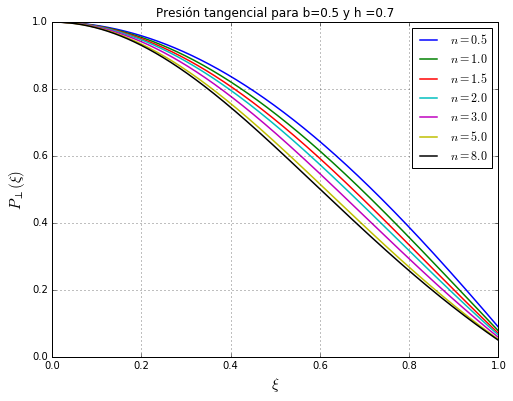

In [8]:
fig, axes = plt.subplots(figsize=(8,6))
for i in range(len(enes)):
	axes.plot(x[:len(Pet[i])], Pet[i],  label='$n = %1.1f$'%enes[i], linewidth=1.50)
axes.legend(loc='best')
axes.set_title(u'Presión tangencial para b=0.5 y h =0.7')
axes.set_xlabel('$\\xi$', fontsize=15)
axes.set_ylabel('$P_\perp (\\xi)$', fontsize=15)
axes.set_xlim(0,R)
axes.set_ylim(0,1)
axes.grid()
fig.savefig('/Volumes/HOME/Proyectos/MasterNewton/Master-newtoniano/Ptan_b05h07.pdf')
fig.show()